In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')

%matplotlib inline

params = {'legend.fontsize': 14,
          'figure.figsize': (15, 8),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14,
         'axes.facecolor': 'white',
         'axes.edgecolor': 'white',
         'axes.grid': 'False',
         'figure.facecolor': 'white'}
plt.rcParams.update(params)

In [82]:
# Leer datos de usuario activos de bicimad del portal de datos abiertos de Madrid
# (versión descargada el 20211021)

usu = pd.read_csv("213155-0-bicimad-usuarios.csv",delimiter = ';', 
                  encoding='iso-8859-1',decimal = ',', thousands='.') 

# Nos quedamos con las columnas fecha y total usuarios activos

usu = usu.iloc[:,[0,7]]
usu.columns = ['fecha','usuarios_activos']
usu['fecha'] = pd.to_datetime(usu['fecha'], format="%m/%d/%y")

# Creamos columna con año y mes para hacer agrupaciones
usu['mes'] = usu['fecha'].dt.strftime('%Y-%m')

# Nos quedamos con el máximo de usuarios de cada mes
usu_max_mes = usu.groupby('mes')['usuarios_activos'].max().reset_index()


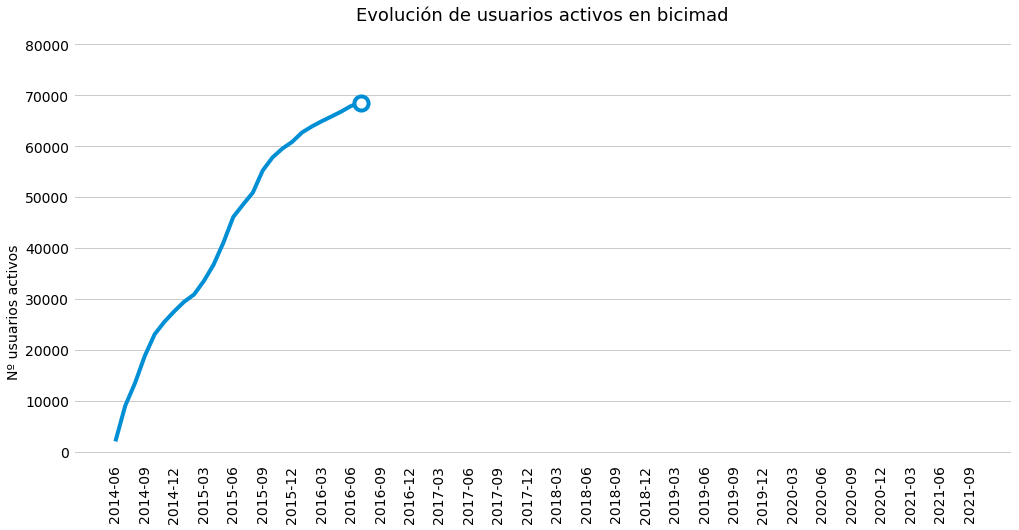

In [83]:
# Visualizar la evolucion de usuarios activos por mes en 1º periodo

# dibujar curva completa
x = usu_max_mes['mes']
y = usu_max_mes['usuarios_activos']

plt.plot(x, y,lw = 4, ls='-', alpha=0, color=sns.color_palette()[0])

#dibujar curva 1º periodo de crecimiento
periodo1 = usu_max_mes[usu_max_mes['mes']<='2016-07']
x1 = periodo1['mes']
y1 = periodo1['usuarios_activos']

plt.plot(x1, y1,lw = 4, ls='-', alpha=1, color=sns.color_palette()[0])
plt.scatter(x[len(periodo1)-1], y[len(periodo1)-1], s = 200, lw= 4, 
            marker = 'o', color=sns.color_palette()[0],fc='w',zorder=12)

plt.grid(axis='y') 
plt.xticks(x[::3], rotation =90)
#plt.yticks(np.arange(0, 80000, step=5000))
           
plt.ylabel('Nº usuarios activos', rotation=90, ha = 'right')

plt.title('Evolución de usuarios activos en bicimad',fontsize= 18)
plt.savefig('images/evol_usuarios_1.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()


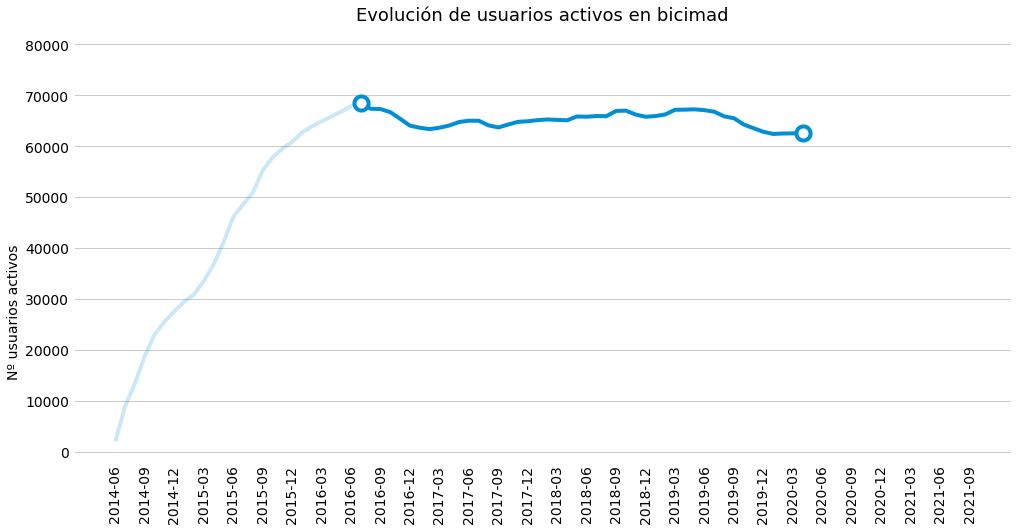

In [84]:
# Visualizar la evolucion de usuarios activos por mes en 2º periodo

# dibujar curva completa
plt.plot(x, y,lw = 4, ls='-', alpha=0, color=sns.color_palette()[0])

#dibujar curva 1º periodo de crecimiento 
plt.plot(x1, y1,lw = 4, ls='-', alpha=0.2, color=sns.color_palette()[0])

#dibujar curva 2º periodo de estabilización
periodo2 = usu_max_mes[(usu_max_mes['mes']>='2016-07') & (usu_max_mes['mes']<='2020-04')]
x2 = periodo2['mes']
y2 = periodo2['usuarios_activos']

plt.plot(x2, y2,lw = 4, ls='-', alpha=1, color=sns.color_palette()[0])
inicio = len(periodo1) -1
fin = inicio + len(periodo2)-1
plt.scatter(x[inicio], y[inicio], s = 200, lw= 4, 
            marker = 'o', color=sns.color_palette()[0],fc='w',zorder=12)
plt.scatter(x[fin], y[fin], s = 200, lw= 4, 
            marker = 'o', color=sns.color_palette()[0],fc='w',zorder=12)

plt.grid(axis='y') 
plt.xticks(x[::3], rotation =90)
#plt.yticks(np.arange(0, 80000, step=5000))
           
plt.ylabel('Nº usuarios activos', rotation=90, ha = 'right')

plt.title('Evolución de usuarios activos en bicimad',fontsize= 18)
plt.savefig('images/evol_usuarios_2.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()


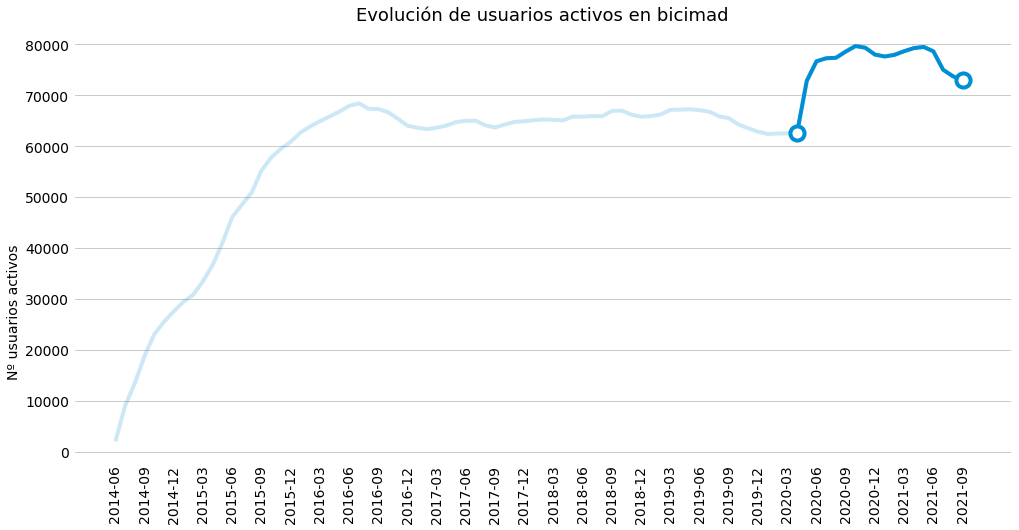

In [85]:
# Visualizar la evolucion de usuarios activos por mes en 3º periodo

# dibujar curva completa
plt.plot(x, y,lw = 4, ls='-', alpha=.2, color=sns.color_palette()[0])

#dibujar curva 3º periodo de estabilización
periodo3 = usu_max_mes[(usu_max_mes['mes']>='2020-04')]
x3 = periodo3['mes']
y3 = periodo3['usuarios_activos']

plt.plot(x3, y3,lw = 4, ls='-', alpha=1, color=sns.color_palette()[0])
inicio = len(periodo1)+ len(periodo2) -2
fin = inicio + len(periodo3)-1
plt.scatter(x[inicio], y[inicio], s = 200, lw= 4, 
            marker = 'o', color=sns.color_palette()[0],fc='w',zorder=12)
plt.scatter(x[fin], y[fin], s = 200, lw= 4, 
            marker = 'o', color=sns.color_palette()[0],fc='w',zorder=12)

plt.grid(axis='y') 
plt.xticks(x[::3], rotation =90)
#plt.yticks(np.arange(0, 80000, step=5000))
           
plt.ylabel('Nº usuarios activos', rotation=90, ha = 'right')

plt.title('Evolución de usuarios activos en bicimad',fontsize= 18)
plt.savefig('images/evol_usuarios_3.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()


In [86]:
# Leer datos de usos de bicicletas

usos = pd.read_csv("216343-0-bicimad-disponibilidad.csv",delimiter = ';', 
                  encoding='iso-8859-1',decimal = ',', thousands='.') 



In [87]:
usos= usos[['DIA','MEDIA_BICICLETAS_DISPONIBLES','TOTAL_USOS']]
usos['DIA'] = pd.to_datetime(usos['DIA'], format="%d/%m/%Y")

# Creamos columna con año y mes para hacer agrupaciones
usos['mes'] = usos['DIA'].dt.strftime('%Y-%m')

# Nos quedamos con la media de usos de cada mes
usos_medios_mes = usos.groupby('mes')['MEDIA_BICICLETAS_DISPONIBLES','TOTAL_USOS'].mean().reset_index()
usos_medios_mes['año'] = usos_medios_mes['mes'].str[:4]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


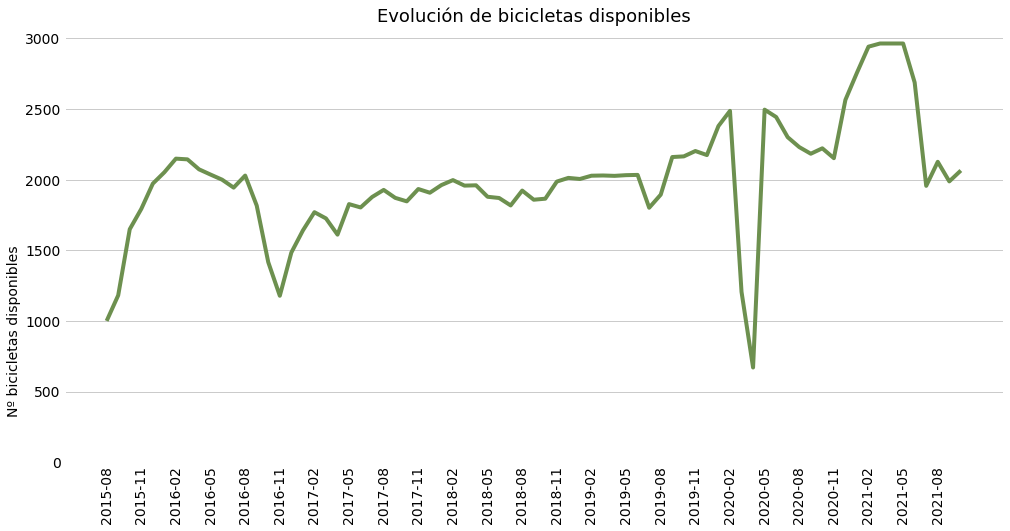

In [90]:
# Visualizar la evolucion de bicicletas disponibles

x = usos_medios_mes['mes']
y = usos_medios_mes['MEDIA_BICICLETAS_DISPONIBLES']

plt.plot(x, y,lw = 4, ls='-', alpha=1, color=sns.color_palette()[3])

plt.grid(axis='y') 
plt.xticks(x[::3], rotation =90)
plt.yticks(np.arange(0, 3500, step = 500))
           
plt.ylabel('Nº bicicletas disponibles', rotation=90, ha = 'right')

plt.title('Evolución de bicicletas disponibles',fontsize= 18)
plt.savefig('images/evol_bicis_disponibles.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

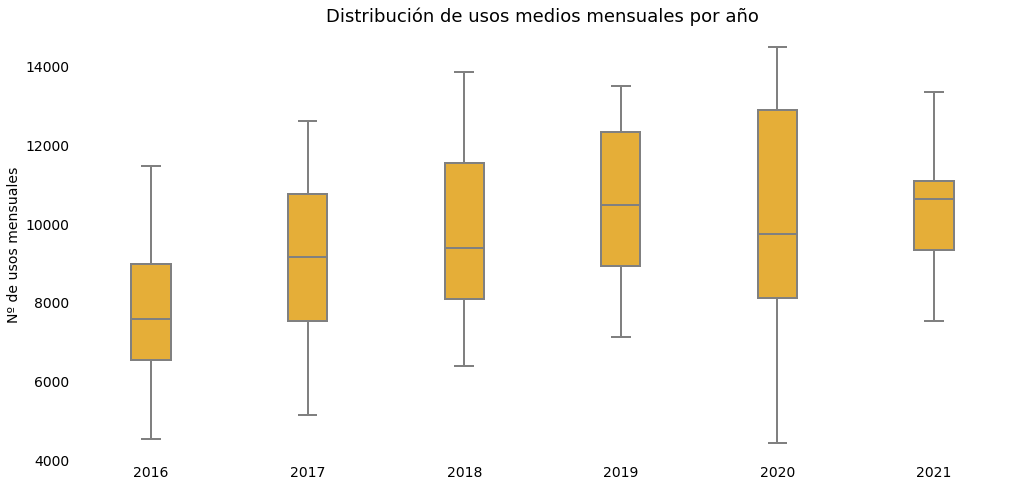

In [91]:
# Visualizar la distribución de usos medios mensuales a lo largo de cada ao de servicio
data = []
for year in range(2016,2022):
    data.append(usos_medios_mes[usos_medios_mes['año']==str(year)]['TOTAL_USOS'].tolist())

bp = plt.boxplot(data,patch_artist=True, labels = range(2016,2022), widths= 0.25, sym='')  

    
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[item], color='grey', alpha = 1, linewidth=2)
plt.setp(bp["boxes"], facecolor=sns.color_palette()[2])
plt.setp(bp["fliers"], markeredgecolor='black')


plt.title('Distribución de usos medios mensuales por año',fontsize= 18)
plt.ylabel('Nº de usos mensuales')
plt.savefig('images/evol_usos_medios.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()